# Projeto 1 - Ciência dos Dados

* Nome: Camila Buzin Ladeira

* Nome: Guilherme Rosada

___
#### Carregando algumas bibliotecas:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

___
#### Carregando arquivos:

In [2]:
import os

filename = 'NuBank.xlsx'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com o projeto ;)')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo NuBank.xlsx, tudo certo para prosseguir com o projeto ;)


___

#### Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [3]:
train = pd.read_excel(filename)
train

,Treinamento,Relevancia
0,"@nubank olá, @nubank ! gostei da junção @easyn...",1
1,@nubank ganho ? 🤩,0
2,quer me chamar de gostosa mas não quer deposit...,0
3,@nubank olha @nubank eu estou arrasada. meu ro...,1
4,"nem sou a galera de fandom de banco mas vsf, d...",1
...,...,...
545,"@nubank oxe, isso ai só acontece quando ta pag...",0
546,ok notificação do nubank também me faz gozar 💦...,0
547,"@021gbr @nubank aumentaram 50 real pa tu, para...",1
548,@magazineluiza oi lu tudo bem amore? fui compr...,1


___
# Funções de Limpeza


Foram limpos:
- Caracteres como ! - . : ? ; " ” “ ) ( / | [ ] 
- Palavras que foram cortadas devido ao limite de caracteres do twitter (terminadas em …)
- Quebras de linha: \n
- Removido o 'rt' no inicio de retweets
- Removido menções à usuários com @
- Removido hiperlinks (http://... e https://...)
- O espaçamento entre palavras foi devidamente corrigido para um único espaço ' '.
- O espaçamento entre Emojis ou emojis grudados às palavras foram corrigidos.

In [4]:
# Função que faz a Limpeza de Strings
import re 


def cleanup(text):
    """
        Função de limpeza muito simples que troca alguns sinais básicos por espaços
    """
    #import string
    punctuation = '[!-.:?;"”“)(/|[\]]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    return text_subbed

In [5]:
# Caso não tenha a biblioteca emoji, é necessário instalá-la (descomente a linha abaixo):
# pip install emoji

In [6]:
import functools
import operator
import emoji

# função para separar emojis 
def separa_emoji(em):
    em_split_emoji = emoji.get_emoji_regexp().split(em)
    em_split_whitespace = [substr.split() for substr in em_split_emoji]
    em_split = functools.reduce(operator.concat, em_split_whitespace)
    
    return em_split

___
## Limpando da Base de Treinamento 

In [7]:
# Transforma Series Treinamento para lista
lista_tweets_train = train.Treinamento.tolist()
lista_tweets_train

['@nubank olá, @nubank ! gostei da junção @easynvest + @nubank . seria um presente maravilhoso se colocassem corretagem zero para ações!',
 '@nubank ganho ? 🤩',
 'quer me chamar de gostosa mas não quer depositar no meu picpay nem transferir no meu nubank👍',
 '@nubank olha @nubank eu estou arrasada. meu roxinho não veio com a bolsinha 😪',
 'nem sou a galera de fandom de banco mas vsf, demorei quase 3 horas na porra do banco do brasil pra resolver uma parada simples. pelo menos no nubank eu resolvo as coisas online e de boa. vtnc!',
 '@nubank eu só queria um porta cartão que vocês dão pra todo mundo e pra mim que já sou cliente antigo vcs não dão 🥺🥺🥺😭',
 '@nubank huum ganhar aquele aumento no limite, huuum',
 '@nubank só queria aumento de limite',
 '@nubank me dá limite vei',
 ' @nubank olha esta que vc citou me atende bem.\nmas o nu foi assim: prometeu uma coisa, não cumpriu e não votlou atrás. empresa que mente para mim só tem uma chance de fazer isso.',
 '@nubank pena que ainda não so

In [8]:
lista_tweets_corrigidos = []

for tweet in lista_tweets_train: # pega cada tweet na lista de tweets
    tweet_clean = cleanup(tweet) # remove caracteres como !-.:?;"”“)(/|[\] de cada tweet  
    lista_palavras = separa_emoji(tweet_clean) # retorna uma lista com split, já separando os emojis 
    i=0
    # LIMPEZA:
    
    # Remove @meções e links (hhtp...)
    while i<len(lista_palavras):
        # investiga palavra por palavra, se começa com @ ou com http:
        if lista_palavras[i][0] == '@' or lista_palavras[i][0:4] == 'http':
            
            # se é o último elemento:
            if i == len(lista_palavras): 
                lista_palavras = lista_palavras[:, i] #exclui só o último elemento
                # Como ele retira um elemento, o len(lista_palavras) muda e, portanto, a ordem dos elementos (i) tambem
                # para se certificar de que ele não deixará passar nenhum elemento, 
                # é necessário q ele analise novamente o elemento[i]
            # se é o primeiro elemento:
            if i == 0:
                lista_palavras = lista_palavras[1:] # Pega todos elementos a partir do segundo, inclusive
            # Se o elemento está no meio da frase --> Separa em duas
            else:    
                inicio = lista_palavras[:i]  # pega todos os elementos até aquele que inicia com @ ou http, exclusivamente
                fim = lista_palavras[i+1:]  # pega o restante dos elementos, começando imediatamente depois do @ ou http

                lista_palavras = inicio + fim
                
        # Remove palavras que não couberam no tweet (terminadas em …)
        elif lista_palavras[-1][-1] == '…': # se o último caractere da palavra for esse símbolo do twitter p/ quebra:
            lista_palavras = lista_palavras[:-1] # Não pega a última palavra
            
        # Remove 'rt':
        elif len(lista_palavras[0]) == 2 and lista_palavras[0][:2] == 'rt':
            lista_palavras = lista_palavras[1:]

        else:
            i+=1 # investia a proxima palavra
    
    # Após remover o que não é útil, resta transformar a lista de volta em string
    string = ''
    for palavra in lista_palavras:
        string += palavra
        string += ' '
        
    string
    
    # E adicionar o string corrigido na lista de tweets corrigidos.
    lista_tweets_corrigidos.append(string[:-1]) # remove o espaço no final, adicionado devido ao looping
    
lista_tweets_corrigidos

['olá gostei da junção seria um presente maravilhoso se colocassem corretagem zero para ações',
 'ganho 🤩',
 'quer me chamar de gostosa mas não quer depositar no meu picpay nem transferir no meu nubank 👍',
 'olha eu estou arrasada meu roxinho não veio com a bolsinha 😪',
 'nem sou a galera de fandom de banco mas vsf demorei quase 3 horas na porra do banco do brasil pra resolver uma parada simples pelo menos no nubank eu resolvo as coisas online e de boa vtnc',
 'eu só queria um porta cartão que vocês dão pra todo mundo e pra mim que já sou cliente antigo vcs não dão 🥺 🥺 🥺 😭',
 'huum ganhar aquele aumento no limite huuum',
 'só queria aumento de limite',
 'me dá limite vei',
 'olha esta que vc citou me atende bem mas o nu foi assim prometeu uma coisa não cumpriu e não votlou atrás empresa que mente para mim só tem uma chance de fazer isso',
 'pena que ainda não sou cliente 🤑 😪',
 'depois de 2 anos reclamando mãe ta de cartao de credito desculpa por sempre xingar vocês',
 'oi nu será que 

In [9]:
# Transformando a lista de tweets corrigidos em Dataframe
dados = pd.DataFrame(lista_tweets_corrigidos, columns=['Treinamento'])
dados['Relevancia'] = train.Relevancia.copy()
dados

,Treinamento,Relevancia
0,olá gostei da junção seria um presente maravil...,1
1,ganho 🤩,0
2,quer me chamar de gostosa mas não quer deposit...,0
3,olha eu estou arrasada meu roxinho não veio co...,1
4,nem sou a galera de fandom de banco mas vsf de...,1
...,...,...
545,oxe isso ai só acontece quando ta paga quando ...,0
546,ok notificação do nubank também me faz gozar 💦 💦,0
547,aumentaram 50 real pa tu para de reclamar ta m...,1
548,oi lu tudo bem amore fui comprar um iphone 11 ...,1


In [10]:
# Separando dados Relevantes dos Irrelevantes:
tweets_relevantes = dados.loc[dados.Relevancia == 1, :]
tweets_irrelevantes = dados.loc[dados.Relevancia == 0, :]

tweets_relevantes.head()

,Treinamento,Relevancia
0,olá gostei da junção seria um presente maravil...,1
3,olha eu estou arrasada meu roxinho não veio co...,1
4,nem sou a galera de fandom de banco mas vsf de...,1
5,eu só queria um porta cartão que vocês dão pra...,1
6,huum ganhar aquele aumento no limite huuum,1


In [11]:
#Relevantes->

# Separando as palavras:
lista_relevantes = tweets_relevantes.Treinamento.tolist()
palavras_relevantes = []
for tweet in lista_relevantes:
    palavras = tweet.split()
    palavras_relevantes += palavras
    
len(palavras_relevantes)

# Criando um dicionario com a contagem de palavras:
dic_relevantes = {}
for palavra in palavras_relevantes:
    if palavra in dic_relevantes:
        dic_relevantes[palavra] +=1
    else:
        dic_relevantes[palavra] = 1
dic_relevantes

# Transformando em um DataFrame
relevantes = pd.DataFrame.from_dict(dic_relevantes, orient='index', columns=['Qtd'])
relevantes

,Qtd
olá,1
gostei,3
da,30
junção,1
seria,1
...,...
ajuda,1
voltar,1
conseguir,1
condições,1


In [12]:
#Irrelevantes->

# Fazendo o mesmo :
# Separando as palavras:
lista_irrelevantes = tweets_irrelevantes.Treinamento.tolist()
palavras_irrelevantes = []
for tweet in lista_irrelevantes:
    palavras = tweet.split()
    palavras_irrelevantes += palavras
    
len(palavras_irrelevantes)

# Criando um dicionario com a contagem de palavras:
dic_irrelevantes = {}
for palavra in palavras_irrelevantes:
    if palavra in dic_irrelevantes:
        dic_irrelevantes[palavra] +=1
    else:
        dic_irrelevantes[palavra] = 1
dic_irrelevantes

# Transformando em um DataFrame
irrelevantes = pd.DataFrame.from_dict(dic_irrelevantes, orient='index', columns=['Qtd'])
irrelevantes

,Qtd
ganho,5
🤩,2
quer,3
me,32
chamar,2
...,...
fica,1
notificação,1
gozar,1
💦,2



### Quantidades absolutas e Probabilidades com Smooth

Probabilidade (smooth) é a Suavilização de Laplace, que será dada por:

$$P(palavra|relevante) = \frac{Nº ocorrências,relevante + 1}{Nº relevantes + Nº total}$$

In [13]:
palavras = relevantes + irrelevantes

In [14]:
total_relevantes = len(relevantes.index)
total_irrelevantes = len(irrelevantes.index)
total_palavras = len(palavras.index)

print (f' Nº de palavras relevantes: {total_relevantes}')
print (f' Nº de palavras irrelevantes: {total_irrelevantes}')
print (f' Nº total de palavras: {total_palavras}')

# Obs.: Como há palavras que se repetem em Relevantes e Irrelevantes, o número total de palavras 
# não é simplesmente a soma do total_relev + total_irrelev

 Nº de palavras relevantes: 1094
 Nº de palavras irrelevantes: 1369
 Nº total de palavras: 1971


In [15]:
relevantes['Probabilidade (smooth)'] = (relevantes.Qtd+1)/(total_relevantes + total_palavras)
relevantes

,Qtd,Probabilidade (smooth)
olá,1,0.000653
gostei,3,0.001305
da,30,0.010114
junção,1,0.000653
seria,1,0.000653
...,...,...
ajuda,1,0.000653
voltar,1,0.000653
conseguir,1,0.000653
condições,1,0.000653


In [16]:
irrelevantes['Probabilidade (smooth)'] = (irrelevantes.Qtd+1)/(total_irrelevantes + total_palavras)
irrelevantes

,Qtd,Probabilidade (smooth)
ganho,5,0.001796
🤩,2,0.000898
quer,3,0.001198
me,32,0.009880
chamar,2,0.000898
...,...,...
fica,1,0.000599
notificação,1,0.000599
gozar,1,0.000599
💦,2,0.000898


___
## Limpeza da Base de Teste 

In [17]:
#pegando o arquivo de teste
base_teste = pd.read_excel(filename, sheet_name="Teste")
base_teste

,Teste,Relevancia
0,@nubank lança um crédito p mim então,1
1,@srxalegria @andlimafu @tigoj6 @phboba @ama_zo...,0
2,@nubank me da cartao de creditooooooo,1
3,inferno @nubank vcs são perfeitos.. eu tava pe...,1
4,@joojubba @nubank @nubank kd o meu que sou cli...,1
...,...,...
195,"@mineiro_goku @nubank @tnubank gostei dessa, b...",0
196,"@nubank bom seria mas um limite nher , q to cm...",1
197,@nubank liberamos teu cartão de crédito,0
198,@nubank @cami23lima queria era um aumento de l...,1


In [18]:
# Transforma Series teste para lista
lista_tweets_teste = base_teste.Teste.tolist()
lista_tweets_teste


['@nubank lança um crédito p mim então',
 '@srxalegria @andlimafu @tigoj6 @phboba @ama_zonia7 @nubank nenhuma evidência factual,  como retirada de direitos de minorias, perseguição oficial a grupos étnicos, etc... como imaginei.',
 '@nubank me da cartao de creditooooooo',
 'inferno @nubank vcs são perfeitos.. eu tava pensando numa forma de não mexer no meu dinheiro por um tempo e veio esse resgate planejado.. tudo',
 '@joojubba @nubank @nubank kd o meu que sou cliente a anos?????? 🤡🤡🤡🤡',
 'rt @piranhadadepweb: @eimarcoos48 @nubank o nubank: https://t.co/spjaio8rpx',
 '@nubank eu só queria a função crédito! 💔',
 'pois me libere um crédito ai https://t.co/8iwudbb4er',
 '@nubank só de terem vocês ao meu lado ja é um ótimo presente 💜💜💜',
 '@nubank @nubank, mês que vem faz um ano que sou cliente. quero brinde. obrigado.',
 '@eduardogd @nubank abre o aplicativo de câmera do smartphone e aponta pro código, é só um link',
 '@nubank se for cliente @nubank não ganha. só perde tempo tentando aume

In [19]:
lista_tweets_corrigidos = []

for tweet in lista_tweets_teste: # pega cada tweet na lista de tweets
    tweet_clean = cleanup(tweet) # remove caracteres como !-.:?;"”“)(/|[\] de cada tweet  
    lista_palavras = separa_emoji(tweet_clean) # retorna uma lista com split, já separando os emojis 
    i=0
    # LIMPEZA:
    
    # Remove @meções e links (hhtp...)
    while i<len(lista_palavras):
        # investiga palavra por palavra, se começa com @ ou com http:
        if lista_palavras[i][0] == '@' or lista_palavras[i][0:4] == 'http':
            
            # se é o último elemento:
            if i == len(lista_palavras): 
                lista_palavras = lista_palavras[:, i] #exclui só o último elemento
                # Como ele retira um elemento, o len(lista_palavras) muda e, portanto, a ordem dos elementos (i) tambem
                # para se certificar de que ele não deixará passar nenhum elemento, 
                # é necessário q ele analise novamente o elemento[i]
            # se é o primeiro elemento:
            if i == 0:
                lista_palavras = lista_palavras[1:] # Pega todos elementos a partir do segundo, inclusive
            # Se o elemento está no meio da frase --> Separa em duas
            else:    
                inicio = lista_palavras[:i]  # pega todos os elementos até aquele que inicia com @ ou http, exclusivamente
                fim = lista_palavras[i+1:]  # pega o restante dos elementos, começando imediatamente depois do @ ou http

                lista_palavras = inicio + fim
                
        # Remove palavras que não couberam no tweet (terminadas em …)
        elif lista_palavras[-1][-1] == '…': # se o último caractere da palavra for esse símbolo do twitter p/ quebra:
            lista_palavras = lista_palavras[:-1] # Não pega a última palavra
            
        # Remove 'rt':
        elif len(lista_palavras[0]) == 2 and lista_palavras[0][:2] == 'rt':
            lista_palavras = lista_palavras[1:]

        else:
            i+=1 # investia a proxima palavra
    
    # Após remover o que não é útil, resta transformar a lista de volta em string
    string = ''
    for palavra in lista_palavras:
        string += palavra
        string += ' '
        
    string
    
    # E adicionar o string corrigido na lista de tweets corrigidos.
    lista_tweets_corrigidos.append(string[:-1]) # remove o espaço no final, adicionado devido ao looping
    
lista_tweets_corrigidos

['lança um crédito p mim então',
 'nenhuma evidência factual como retirada de direitos de minorias perseguição oficial a grupos étnicos etc como imaginei',
 'me da cartao de creditooooooo',
 'inferno vcs são perfeitos eu tava pensando numa forma de não mexer no meu dinheiro por um tempo e veio esse resgate planejado tudo',
 'kd o meu que sou cliente a anos 🤡 🤡 🤡 🤡',
 'o nubank',
 'eu só queria a função crédito 💔',
 'pois me libere um crédito ai',
 'só de terem vocês ao meu lado ja é um ótimo presente 💜 💜 💜',
 'mês que vem faz um ano que sou cliente quero brinde obrigado',
 'abre o aplicativo de câmera do smartphone e aponta pro código é só um link',
 'se for cliente não ganha só perde tempo tentando aumentar o limite',
 'bem que eu podia receber um presentinho né',
 'deveria aprovar um cartão de crédito pra mim afff',
 'fiquei puta com meu néon aí solicitei o nubank e agora tô sem dinheiro pq não compensou o boleto do nb 🤡 🤡 🤡 🤡 🤦🏽\u200d♀️',
 'parabéns flores o maior vencedor do nu awa

In [20]:
# Transformando a lista de tweets corrigidos em Dataframe
teste = pd.DataFrame(lista_tweets_corrigidos, columns=['Teste'])
teste['Relevancia'] = base_teste.Relevancia.copy()
teste

,Teste,Relevancia
0,lança um crédito p mim então,1
1,nenhuma evidência factual como retirada de dir...,0
2,me da cartao de creditooooooo,1
3,inferno vcs são perfeitos eu tava pensando num...,1
4,kd o meu que sou cliente a anos 🤡 🤡 🤡 🤡,1
...,...,...
195,gostei dessa bem mais compacta o meu tá com a ...,0
196,bom seria mas um limite nher q to cm 400 desde...,1
197,liberamos teu cartão de crédito,0
198,queria era um aumento de limite dona,1


___
## Classificador de sentimento


Descrição do  produto e o que foi considerado como relevante ou não relevante na classificação dos tweets.

_O produto, na verdade, é uma marca: o **NuBank**_     
_Como relevante, consideramos tweets que possam denegrir a marca (comentários negativos sobre a marca ou algum de seus produtos e/ou críticas à empresa) e/ou que mereçam alguma atenção da empresa, seja por apontarem alguma falha ou por apontarem exigências / desejos dos clientes aos quais a empresa deva se atentar_.

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensinando o classificador.

In [21]:
# Cálculo de P(rel) e P(irrel)
p_rel = total_relevantes / total_palavras
p_irrel = total_irrelevantes / total_palavras


In [22]:
def classificador(tweet):
    lista_palavras = tweet.split()
    classificacao = ''
    p_tweet_rel = 1
    p_tweet_irrel = 1
    
    for palavra in lista_palavras:
        
        if palavra not in relevantes.index:
            p_tweet_rel *= (0+1)/(total_relevantes + total_palavras)
        
        else: # palavra in relevantes.index:
            p_tweet_rel *= relevantes['Probabilidade (smooth)'][palavra]
            
        if palavra not in irrelevantes.index:
            p_tweet_irrel *= (0+1)/(total_irrelevantes + total_palavras)
                
        else: # palavra in irrelevantes.index:
            p_tweet_irrel *= irrelevantes['Probabilidade (smooth)'][palavra]
            
    p_rel_tweet = p_tweet_rel * p_rel
    p_irrel_tweet = p_tweet_irrel * p_irrel
    
    if p_rel_tweet > p_irrel_tweet:
        classificacao = 'relevante'
        
    if p_rel_tweet < p_irrel_tweet:
        classificacao = 'irrelevante'
        
    #print(f'Classificacao: {classificacao}\n p(rel|tweet) = {p_rel_tweet} \n p(irrel|Tweet) = {p_irrel_tweet}')
    return classificacao, p_rel_tweet, p_irrel_tweet

In [23]:
teste['Classificacao'] = '_'
lista_classificacoes = []
for i in range(len(teste.index)):
    tweet = teste.iloc[i, 0]
    resultado = classificador(tweet)[0]
    
    # cria lista com os resultados das probabilidades
    lista_classificacoes.append(classificador(tweet))
    
    teste.iloc[i, 2] = resultado
lista_classificacoes # lista contendo todos os valores de p(rel) e p(irrel) p/ os tweets. --> Colocá-los em grupos.

[('relevante', 2.0011227974989497e-16, 1.905575636041181e-16),
 ('irrelevante', 5.848148646469326e-52, 7.121207966482275e-52),
 ('irrelevante', 1.0259365731158116e-12, 1.3201478590922992e-12),
 ('relevante', 9.008537556957291e-64, 5.765669333760617e-65),
 ('irrelevante', 7.693854272995742e-31, 1.6764379731420487e-30),
 ('irrelevante', 0.0005474130716113941, 0.0007533093657379414),
 ('relevante', 1.2687479626983381e-16, 9.632778826316187e-18),
 ('relevante', 8.821276005301492e-16, 2.6201664995566244e-16),
 ('irrelevante', 5.1815208693912106e-39, 1.3478896538961254e-38),
 ('relevante', 3.3144212443447515e-31, 3.151036813797997e-32),
 ('relevante', 2.4473496853735132e-39, 2.4445795214873293e-39),
 ('relevante', 3.4638893886736243e-31, 1.0879798058986728e-32),
 ('relevante', 2.2110176213559956e-20, 1.2516740037010348e-20),
 ('relevante', 1.223192954426164e-22, 3.731398360157788e-23),
 ('irrelevante', 4.090873071159767e-68, 1.5454940481544123e-67),
 ('relevante', 3.7649284458098306e-47, 1.4

In [24]:
teste.head()

,Teste,Relevancia,Classificacao
0,lança um crédito p mim então,1,relevante
1,nenhuma evidência factual como retirada de dir...,0,irrelevante
2,me da cartao de creditooooooo,1,irrelevante
3,inferno vcs são perfeitos eu tava pensando num...,1,relevante
4,kd o meu que sou cliente a anos 🤡 🤡 🤡 🤡,1,irrelevante


___
## Verificando a performance do Classificador

Testando o  classificador com a base de Testes.

In [25]:
teste.Classificacao = teste['Classificacao'].astype('category')
teste.Relevancia = teste['Relevancia'].astype('category')
teste.dtypes

Teste              object
Relevancia       category
Classificacao    category
dtype: object

In [26]:
# Análise relativa do acerto
analise_relativa_acertos = pd.crosstab(teste.Relevancia, teste.Classificacao, normalize='columns').round(6)*100
analise_relativa_acertos

Classificacao,irrelevante,relevante
Relevancia,,
0,69.7674,36.8421
1,30.2326,63.1579


_Com a tabela, percebe-se que há um bom acerto relativo das mensagens realmente irrelevantes (aprox. 70%) e das mensagens realmente relevantes (aprox. 63%)_ 


In [27]:
# Distribuição dos acertos:
distribuicao_acertos = pd.crosstab(teste.Relevancia, teste.Classificacao, normalize='all').round(6)*100
distribuicao_acertos

Classificacao,irrelevante,relevante
Relevancia,,
0,30.0,21.0
1,13.0,36.0



_Portanto, dos resultados, 66% foi classificado corretamente._

---- 
### Criando classificações por grau de relevância

Para isso, vamos organizar os valores de probabilidade em uma lista disposta em ordem decrescente dos valores de probabilidade dos classificados como `relevante` ou `irrelevante`.

Para facilitar a visualização dos dados, trabalharemos com o $\log_{10}P(tweet)$

em que: Se $X_{1} > X_{2} \rightarrow \log_{10}X_{1} > \log_{10}X_{2} $

In [28]:
# Separando os valores de P em uma lista:
from math import log
probabilidades = []
probabilidades_irrel =[]
probabilidades_rel =[]
for tweet in lista_classificacoes:
    if tweet[0] == 'relevante':
        probabilidades.append(log(tweet[1],10)) 
        probabilidades_rel.append(log(tweet[1],10))
    if tweet[0] == 'irrelevante':
        probabilidades.append(log(tweet[2],10))
        probabilidades_irrel.append(log(tweet[2],10)) 
        
teste['LogP'] = probabilidades

In [29]:
numero_relevantes = len(probabilidades_rel)
numero_irrelevantes = len(probabilidades_irrel)

print(f' Numero Tweets Relevantes: {numero_relevantes} \n Numero Tweets Irrelevantes: {numero_irrelevantes}')

 Numero Tweets Relevantes: 114 
 Numero Tweets Irrelevantes: 86


___
Podemos dividir os Tweets Relevantes/Irrelevantes, ordenados em ordem decrescente, em 3 grupos de igual tamanho.    
Ou seja:
    - Para os relevantes:
        - A: Muito Relevantes: primeiro terceto [0:39] - 39 elementos
        - B: Relevantes: segundo terceto [39:79] - 39 elementos
        - C: Neutro: restante - 40 elementos
    - Para os irrelevantes:
        - E: Muito Irrelevantes: primeiro terceto [0:27] - 27 elementos 
        - D: Irrelevantes: segundo terceto [27:55] - 27 elementos
        - C: Neutro: restante - 28 elementos

In [30]:
probabilidades_rel.sort(reverse=True)
probabilidades_irrel.sort(reverse=True)

# Encontrando os valores que delimitam o limite inferior de cada agrupamento:
lim_rel_A = probabilidades_rel[38] # muito relevantes
lim_rel_B = probabilidades_rel[78] # relevantes

lim_irrel_E = probabilidades_irrel[26] # muito irrelevantes
lim_irrel_D = probabilidades_irrel[54] # irrelevantes

print (f' Limites Inferiores: \n RELEVANTES: \n A: {lim_rel_A} \n B: {lim_rel_B} \n\n IRRELEVANTES: \n E: {lim_irrel_E} \n D: {lim_irrel_D}')


 Limites Inferiores: 
 RELEVANTES: 
 A: -17.544442124002444 
 B: -36.71248700780504 

 IRRELEVANTES: 
 E: -17.739360631699498 
 D: -37.87034566022323


In [31]:
teste.loc[(teste.Classificacao == 'relevante')&(teste.LogP >= lim_rel_A), 'Grau'] = 'A'
teste.loc[(teste.Classificacao == 'relevante')&(teste.LogP < lim_rel_A) , 'Grau'] = 'B'
teste.loc[(teste.Classificacao == 'relevante')&(teste.LogP < lim_rel_B), 'Grau'] = 'C'

teste.loc[(teste.Classificacao == 'irrelevante')&(teste.LogP >= lim_irrel_E), 'Grau'] = 'E'
teste.loc[(teste.Classificacao == 'irrelevante')&(teste.LogP < lim_irrel_E) , 'Grau'] = 'D'
teste.loc[(teste.Classificacao == 'irrelevante')&(teste.LogP < lim_irrel_D), 'Grau'] = 'C'


teste

,Teste,Relevancia,Classificacao,LogP,Grau
0,lança um crédito p mim então,1,relevante,-15.698726,A
1,nenhuma evidência factual como retirada de dir...,0,irrelevante,-51.147446,C
2,me da cartao de creditooooooo,1,irrelevante,-11.879377,E
3,inferno vcs são perfeitos eu tava pensando num...,1,relevante,-63.045346,C
4,kd o meu que sou cliente a anos 🤡 🤡 🤡 🤡,1,irrelevante,-29.775613,D
...,...,...,...,...,...
195,gostei dessa bem mais compacta o meu tá com a ...,0,relevante,-30.274153,B
196,bom seria mas um limite nher q to cm 400 desde...,1,relevante,-35.475261,B
197,liberamos teu cartão de crédito,0,irrelevante,-12.427264,E
198,queria era um aumento de limite dona,1,relevante,-15.679325,A


In [32]:
teste.Grau = teste.Grau.astype('category')
teste.Grau = teste.Grau.cat.reorder_categories(['E','D','C','B','A'])
teste.Grau = teste.Grau.cat.as_ordered()
teste.Grau.cat.categories = ['Muito Irrelevante', 'Irrelevante', 'Neutro', 'Relevante', 'Muito Relevante']
teste.Grau

0        Muito Relevante
1                 Neutro
2      Muito Irrelevante
3                 Neutro
4            Irrelevante
             ...        
195            Relevante
196            Relevante
197    Muito Irrelevante
198      Muito Relevante
199               Neutro
Name: Grau, Length: 200, dtype: category
Categories (5, object): [Muito Irrelevante < Irrelevante < Neutro < Relevante < Muito Relevante]

In [33]:
teste

,Teste,Relevancia,Classificacao,LogP,Grau
0,lança um crédito p mim então,1,relevante,-15.698726,Muito Relevante
1,nenhuma evidência factual como retirada de dir...,0,irrelevante,-51.147446,Neutro
2,me da cartao de creditooooooo,1,irrelevante,-11.879377,Muito Irrelevante
3,inferno vcs são perfeitos eu tava pensando num...,1,relevante,-63.045346,Neutro
4,kd o meu que sou cliente a anos 🤡 🤡 🤡 🤡,1,irrelevante,-29.775613,Irrelevante
...,...,...,...,...,...
195,gostei dessa bem mais compacta o meu tá com a ...,0,relevante,-30.274153,Relevante
196,bom seria mas um limite nher q to cm 400 desde...,1,relevante,-35.475261,Relevante
197,liberamos teu cartão de crédito,0,irrelevante,-12.427264,Muito Irrelevante
198,queria era um aumento de limite dona,1,relevante,-15.679325,Muito Relevante


___
# Conclusão

Conforme evidenciado acima, esse projeto utilizou uma base de dados de Treinamento para o Naive-Bayes de 550 tweets e testou o desempenho com outra base de Teste com mais 200 tweets, a qual tinha a seguinte composição:

In [34]:
teste['Relevancia'].value_counts()

0    102
1     98
Name: Relevancia, dtype: int64

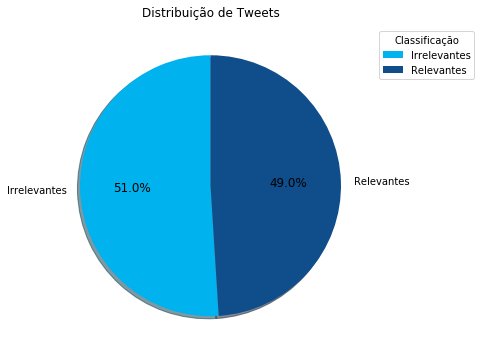

In [35]:
fig, ax0 = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

# Dados para compor o gráfico
relevancia0 = ['Irrelevantes', 'Relevantes']
# Definindo a quantidade de cada dado
data0 = [102, 98]
#definindo cores
c0 = ['#00B2EE', '#104E8B']
# Criando o gráfico e colocando a função da legenda interna
wedges, texts, autotexts = ax0.pie(data0,  labels=relevancia0, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=c0)

# Definindo a caixa de legenda externa, título, localização e onde vai 'ancorar o box'
ax0.legend(wedges, relevancia0,
          title="Classificação",
          loc="center left",
          bbox_to_anchor=(1, 0.4, 0.5, 1))

# Aqui definimos o tamanho do texto de dentro do gráfico, e o peso da fonte como bold
plt.setp(autotexts, size=12)

# Título do gráfico
ax0.set_title("Distribuição de Tweets")

# Mostrando o gráfico
plt.show()

Passando essa base de teste pelo classificador, obtem-se o seguinte resultado:

### Distribuição de tweets:

| (%)  | (%)  |
|---|---|
|<font color=green> Negativos Verdadeiros </font> | <font color=red> Negativos Falsos </font> |
|<font color=red> Positivos Falsos </font> |<font color=green> Positivos Verdadeiros </font> |

In [36]:
distribuicao_acertos

Classificacao,irrelevante,relevante
Relevancia,,
0,30.0,21.0
1,13.0,36.0


Portanto, pode-se perceber que o classificador teve uma precisão de $30\% + 36\%$ = $66\%$, o que pode ser considerado como uma precisão razoável, dado que só utiliza as palavras 'cruas' para classificar os tweets, sem nenhum ponderamento pelo conteúdo da palavra. Graficamente, tem-se:

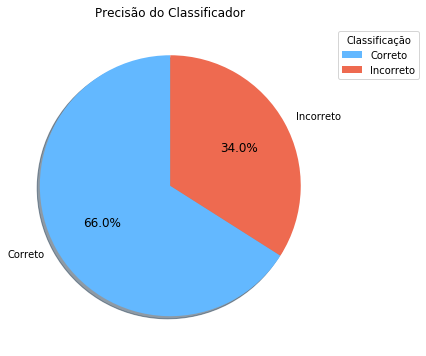

In [37]:
# Aqui criamos a área que plotamos o gráfico e definimos seu tamanho
fig, ax1 = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

# Dados para compor o gráfico
relevancia = ['Correto', 'Incorreto']

# Definindo a quantidade de cada dado
data = [66, 34]

# Aqui serão colocados  as porcentagens no gráfico
def func(pct, allvals):
    return "{:.1f}%".format(allvals)

#definindo cores
c1 = ['#63B8FF', "#EE6A50"]

# Criando o gráfico e colocando a função da legenda interna
wedges, texts, autotexts = ax1.pie(data,  labels=relevancia, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=c1)

# Definindo a caixa de legenda externa, título, localização e onde vai 'ancorar o box'
ax1.legend(wedges, relevancia,
          title="Classificação",
          loc="center left",
          bbox_to_anchor=(1, 0.4, 0.5, 1))

# Aqui definimos o tamanho do texto de dentro do gráfico, e o peso da fonte como bold
plt.setp(autotexts, size=12)

# Título do gráfico
ax1.set_title("Precisão do Classificador")

# Mostrando o gráfico
plt.show()

Ainda, podemos analisar por grupos (irrelevantes/relevantes) e identificar o percentual de acerto relativo:

In [38]:
analise_relativa_acertos 

Classificacao,irrelevante,relevante
Relevancia,,
0,69.7674,36.8421
1,30.2326,63.1579


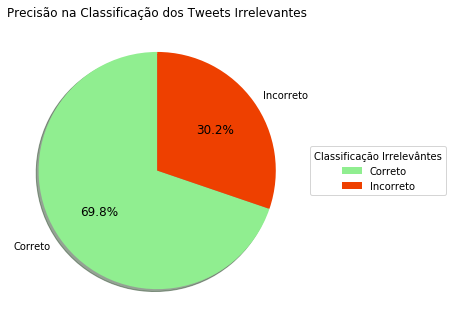

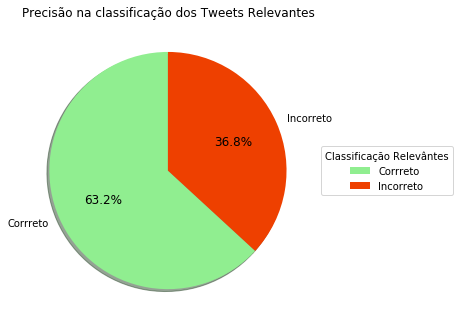

In [39]:
fig, ax2 = plt.subplots(figsize=(12, 12), subplot_kw=dict(aspect="equal")), plt.subplot(2, 2, 1)
# Dados para compor o gráfico
relevancia = ['Correto', 'Incorreto']
# Definindo a quantidade de cada dado
data2 = [69.7674,30.2326]
#definindo cores
c2 = ['#90EE90', "#EE4000",'#7CCD7C' , '#CD3700']
# Criando o gráfico e colocando a função da legenda interna
wedges, texts, autotexts = ax2.pie(data2,  labels=relevancia, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=c2)

# Definindo a caixa de legenda externa, título, localização e onde vai 'ancorar o box'
ax2.legend(wedges, relevancia,
          title="Classificação Irrelevântes",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Aqui definimos o tamanho do texto de dentro do gráfico, e o peso da fonte como bold
plt.setp(autotexts, size=12)

# Título do gráfico
ax2.set_title("Precisão na Classificação dos Tweets Irrelevantes")

#---------------------------------------------------------------------------------------------------
fig, ax4 = plt.subplots(figsize=(12, 12), subplot_kw=dict(aspect="equal")), plt.subplot(2, 2, 3)
# Dados para compor o gráfico
relevancia2 = ['Corrreto', 'Incorreto']
# Definindo a quantidade de cada dado
data4 = [63.1579, 36.8421]
#definindo cores
c4 = ['#90EE90', "#EE4000"]

# Criando o gráfico e colocando a função da legenda interna
wedges, texts, autotexts = ax4.pie(data4,  labels=relevancia2, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=c4)

# Definindo a caixa de legenda externa, título, localização e onde vai 'ancorar o box'
ax4.legend(wedges, relevancia2,
          title="Classificação Relevântes",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Aqui definimos o tamanho do texto de dentro do gráfico, e o peso da fonte como bold
plt.setp(autotexts, size=12)

# Título do gráfico
ax4.set_title("Precisão na classificação dos Tweets Relevantes")

# Mostrando o gráfico
plt.show()

Com um olhar relativo, pode-se perceber que o classificador acusou corretamente aproximadamente $70\%$ dos tweets irrelevantes e aproximadamente $64\%$ dos relevantes 

Por fim, pode-se analisar a distribuição de relevância dos tweets:

In [40]:
#dados 
valores = teste['Grau'].value_counts()
valores

Neutro               66
Relevante            40
Muito Relevante      39
Irrelevante          28
Muito Irrelevante    27
Name: Grau, dtype: int64

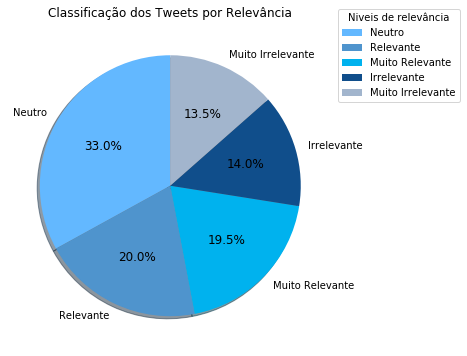

In [41]:
fig, ax3 = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

# Dados para compor o gráfico
relevancia = ["Neutro",
          "Relevante",
          "Muito Relevante",
          "Irrelevante",
          "Muito Irrelevante"]

# Definindo a quantidade de cada dado
data3 = [66, 40, 39, 28, 27]

#definindo cores
c3 = ['#63B8FF', '#4F94CD', '#00B2EE', '#104E8B', '#A2B5CD']

# Criando o gráfico e colocando a função da legenda interna
wedges, texts, autotexts = ax3.pie(data3,  labels=relevancia, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=c3)


# Definindo a caixa de legenda externa, título, localização e onde vai 'ancorar o box'
ax3.legend(wedges, relevancia,
          title="Niveis de relevância",
          loc="center left",
          bbox_to_anchor=(1, 0.4, 0.5, 1))

# Aqui definimos o tamanho do texto de dentro do gráfico, e o peso da fonte como bold
plt.setp(autotexts, size=12)

# Título do gráfico
ax3.set_title("Classificação dos Tweets por Relevância")

# Mostrando o gráfico
plt.show()

### Tratamento dos Tweets:

Aqui, é importante relatar que o classificador conseguiu ter um bom desempenho apenas com um olhar puramente analítico. Apenas 'desnudando as palavras', ele foi capaz de classificar, com 66% de precisão, a relevãncia ou não de um tweet. Dessa forma, tweets com dupla negação ou com sarcasmo foram interpretados de maneira literal, analítica -- o sarcamos não é identificado pelo classificador. A única influência do sarcasmo foi na definição prévia do tweet, se era relevante ou não. Nesse contexto, julgamos o tweet a partir da nossa interpretação da frase, se era sarcástica ou não e se conferia com os critérios definidos na classificação dos tweets

### Plano de Expansão:

Com o classificador básico já estabelecido, agora é possível ampliar o projeto. Propomos duas possíveis abordagens:

1. Configurar o classificador para que destine os tweets relevantes para os respectivos setores da empresa ao qual se mais se relacionam  (Ampliação de Crédito / Suporte técnico / Atendimento ao Cliente etc)
2. Aperfeiçoar a classificação, dando pesos diferentes a frases ou palavras específicas, de acordo com o entendimento da empresa sobre o assunto tratado pelos clientes. Para isso, poderá ser implementada a ferramenta advertools, uma biblioteca utilizada para o tratamento de marketing nas redes sociais, com funcionalidades mais poderosas para abranger o assunto.
Veja mais em: https://advertools.readthedocs.io/en/master/readme.html



___
### Outras aplicações do Naive Bayes 

   _1. Previsões em tempo real, dado que é muito rápido no aprendizado dos padrões e devolução de valores. Um exemplo válido de previsões em tempo real occore quando uma pessoa está compando online e os seus próximos movimentos podem ser previstos de acordo com os anteriores. Assim, pode-se propor novos produtos, com maiores chances de venda (https://cloudacademy.com/course/amazon-machine-learning/real-time-predictions-1/)_
   
   _2. Previsões de diferentes variedades e classes do objetivo ao mesmo tempo. Como por exemplo como escolher um produto no momento prediz a probabilidade das proximas escolhas;_
   
   _3. Usado na classificação de textos,  classificando o documento de texto ou apenas um texto, em  filtro de spam (emails, sms), análise de sentimentos em  redes sociais, auto rotulando desejos dos consumidosres(como sugestão de compra por exemplo), categorização de artigos de notícias em tópicos definidos;_ 
   
   _4. Sistema de classificação, juntando com outros classificadores( como o collaborative filtering) é possivel filtrar informações "ocultas" que preditam se o usuaria iria curtir ou não certo recurso._ 
    
https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/
https://acadgild.com/blog/naive-bayesian-model#:~:text=Below%20are%20the%20common%20applications,classes%20of%20the%20target%20variable.    


----
### Classificador como gerador de amostra:

`É possível utilizar o classificador para gerar mais amostras ? `

_Não é aconselhável_.    
_A base de treinamento tem o papel de ensinar parâmetros e referências ao classificador através dos padrões de conduta dos usuários do Twitter. Assim, para um melhor funcionamento, a base deve ser a mais 'orgânica' possível, sofrendo o mínimo de influências ou correções externas. Desse modo, se o classificador recebe um ensinamento gerado por ele mesmo (ou seja, com suas dificuldades e erros de referência), ele passará a utilizar referências que reforçam esses possíveis erros, tornando-se menos assertivo. Assim, ao invés de aprimorar a precisão do classificador, fornecendo novas pistas orgânicas de padrões de conduta dos usuários, as novas amostras estariam apenas reforçando aquilo que o classificador acredita ser o correto, podendo, inclusive, mascarar os padrões de conduta reais. Ou seja, o treinamento não seria muito útil, pois ele não aprenderá ou aperfeiçoará outros parâmetros_. 

http://www.anpad.org.br/diversos/down_zips/7/enanpad2003-adi-2077.pdf
https://medium.com/@lhessani.sa/what-is-the-difference-between-training-and-test-dataset-91308080a4e8

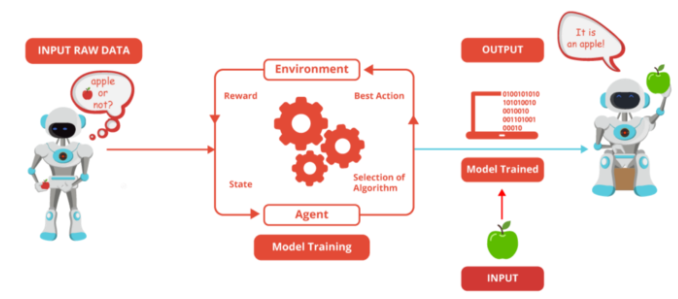 

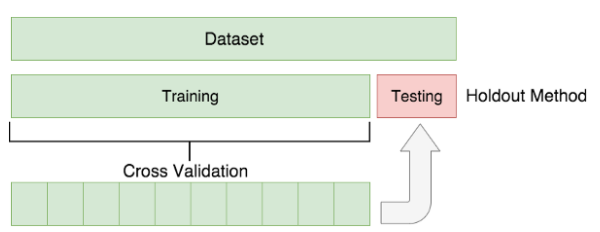

---
### Melhorias na implementação do Naive-Bayes  

1. Probabilidade logarítima 

    Como os tweets podem possuir muitas palavras e, como a probabilidade de uma única palavra não é tão alta, o produtório final resulta em números muito pequenos. Para alguns casos, obtivemos resultados na ordem de $10^{-80}$. Conforme os números ficam cada vez menores, podem ocorrer algumas imprecisões nos cálculos, devido às dificuldades das linguagens de programação e da capacidade computacional. Para sanar isso, pode-se trabalhar com as probabilidades em escala logaritmica, desde o início. Os links a seguir mostram o porquê da implementação, conta matemática de substituição e exemplos na implementação de python. 
    
http://www.cs.rhodes.edu/~kirlinp/courses/ai/f18/projects/proj3/naive-bayes-log-probs.pdf
        
https://stats.stackexchange.com/questions/163088/how-to-use-log-probabilities-for-gaussian-naive-bayes

https://gist.github.com/harrymvr/3991982


https://stackoverflow.com/questions/37345314/complication-using-log-probabilities-naive-bayes-text-classifier

2. Limpeza de texto

    Outra maneira de aperfeiçoar o classificador está relacionado a mais critérios de limpeza, sendo a mudança de uma palavra variada pra sua de origem, arrumar abreviações e palavras de junção da frase como artigos e "de, da, do" Os links a seguir explicam como podem ser feitas essas remoções 
    
https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/

https://datascience.stackexchange.com/questions/31413/how-to-improve-naive-bayes

https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

https://machinelearningmastery.com/better-naive-bayes/

https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/

    Obs.: Outra limpeza possível seria a remoção de palavras 'estruturais' da fala, ou seja, palavras que, sozinhas, não teriam significado algum, mas que são utilizadas na língua para conectá-la ou dar estrutura. Em essência: preposições (de, da, do, com, etc) e conjunções. Porém, para se assegurar de que palavras importantes não sejam excluídas (ex.: para(preposição) vs. para(verbo)), poderíamos fazer o seguinte questionamento mental: "É possível formular uma frase utilizando essa palavra, tal que ela tenha certa relevância na mensagem transmitida?" Se a resposta for 'sim', então não excluímos a palavra. Caso contrário, ela poedrá ser excluída. (ex.: "Nubank, para de me incomodar com notificações!" --> Mensagme relevante, cujo o 'para' foi significativo).


referência:

https://github.com/matheusbattisti/pie_charts/blob/master/piechart.ipynb